<a href="https://colab.research.google.com/github/feracor/Curso-de-Algebra-Lineal-Aplicada-para-Machine-Learning/blob/main/Algebra_Lineal_Aplicada_para_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso de Álgebra Lineal Aplicada para Machine Learning - 2022


# **2- Podemos y debemos pensar a las matrices como transformaciones lineales**


In [ ]:
%matplotlib inline    
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
A = np.array([[-1,3],[2,-2]])
A

array([[-1,  3],
       [ 2, -2]])

In [ ]:
vector = np.array([[2],[1]])
vector

array([[2],
       [1]])

In [ ]:
#funcion para graficar vectores
def graficarVectores(vecs, cols, alpha = 1):
  plt.axvline(x = 0, color = 'red', zorder = 0)
  plt.axhline(y = 0, color = 'grey', zorder = 0)

  for i in range(len(vecs)):
    x =  np.concatenate([[0,0], vecs[i]])
    plt.quiver ([x[0]],
                [x[1]],
                [x[2]],
                [x[3]],
                angles = 'xy', scale_units = 'xy',
                scale= 1,
                color = cols[i],
                alpha = alpha
                )

In [ ]:
print(vector)
print(vector.flatten())

[[2]
 [1]]
[2 1]


In [ ]:
print(A)
print(A.flatten())

[[-1  3]
 [ 2 -2]]
[-1  3  2 -2]


(-0.5, 2.0)

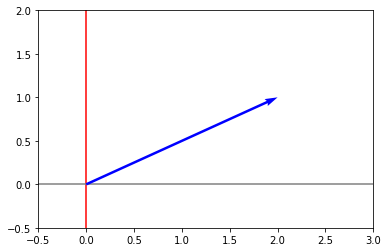

In [ ]:
graficarVectores([vector.flatten()], cols = 'blue')

plt.xlim(-0.5,3)
plt.ylim(-0.5,2)

In [ ]:
vector_transformado = A.dot(vector)
vector_transformado

array([[1],
       [2]])

(-0.5, 2.5)

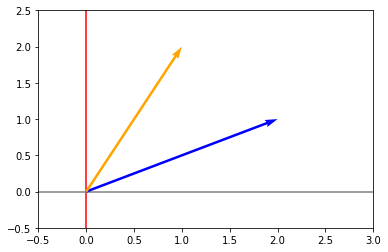

In [ ]:
graficarVectores([vector.flatten(),vector_transformado.flatten()], 
                 cols = ['blue', 'orange'])
plt.xlim(-0.5,3)
plt.ylim(-0.5,2.5)

In [ ]:
print(np.linalg.det(A)) # Calcular determinante

-4.0


In [ ]:
print(np.linalg.norm(vector)) # Verificar norma del vesctor
print(np.linalg.norm(vector_transformado)) # Verificar norma del vesctor

2.23606797749979
2.23606797749979


# **3 - Autovalores y Autovectores**


In [ ]:
#Definir colores
orange_light = '#FF9A13'
blue_light = '#1190FF'

In [ ]:
#definir matriz
X = np.array([[3,2],[4,1]])
print(X)

[[3 2]
 [4 1]]


In [ ]:
# Definir vector
v= np.array([[1],[1]])
v

array([[1],
       [1]])

In [ ]:
#Vector trandormado
u = X.dot(v) #Producto interno
u

array([[5],
       [5]])

(-1.0, 6.0)

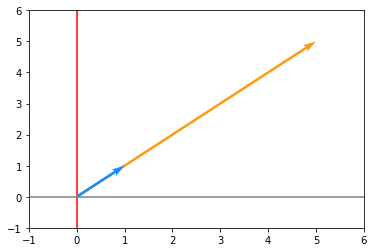

In [ ]:
graficarVectores([u.flatten(), v.flatten()], cols = [orange_light, blue_light])

plt.xlim(-1,6)
plt.ylim(-1,6)


In [ ]:
# Un auto vector es aquel que cuando se le aplica una matriz, devuelve un vector en la misma direccion pero con su magnitud amplificada

lamda_1 = 5
lamda_1 * v

array([[5],
       [5]])

In [ ]:
s = np.array ([[-1],[2]])
s

array([[-1],
       [ 2]])

In [ ]:
t = X.dot(s)
t

array([[ 1],
       [-2]])

(-3.0, 3.0)

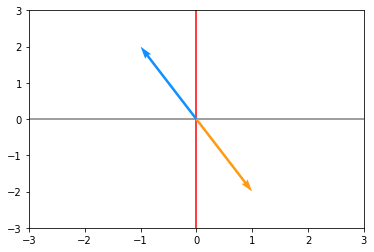

In [ ]:
graficarVectores([t.flatten(), s.flatten()], cols = [orange_light, blue_light])

plt.xlim(-3,3)
plt.ylim(-3,3)


# 4 - Cómo calcular los autovalores y autovectores

In [ ]:
#Definir una matriz para hllar autovalores y auto vectores
X = np.array ([[3,2],[4,1]])
X

array([[3, 2],
       [4, 1]])

In [ ]:
np.linalg.eig(X)

(array([ 5., -1.]), array([[ 0.70710678, -0.4472136 ],
        [ 0.70710678,  0.89442719]]))

In [ ]:
autovalores, autovectores = np.linalg.eig(X)
autovalores

array([ 5., -1.])

In [ ]:
autovectores[:,0]

array([0.70710678, 0.70710678])

In [ ]:
autovectores[:,1]

array([-0.4472136 ,  0.89442719])

In [ ]:
v = np.array([[-1],[2]])
Xv = X.dot(v)
v_np = autovectores[:,1]

(-7.0, 3.0)

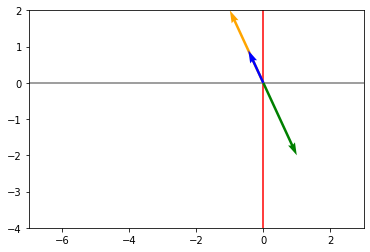

In [ ]:
graficarVectores([Xv.flatten(), v.flatten(), v_np], cols = ['green', 'orange', 'blue'])

plt.ylim(-4,2)
plt.xlim(-7,3)


# 5 - Descomposición de matrices

In [ ]:
A = np.array([[3,2],[4,1]])
A

array([[3, 2],
       [4, 1]])

In [ ]:
autovalores, autovectores = np.linalg.eig(A)

In [ ]:
print(autovalores)
print(autovectores)

[ 5. -1.]
[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]


In [ ]:
A_cal = autovectores.dot(np.diag(autovalores)).dot(np.linalg.inv(autovectores))
A_cal

array([[3., 2.],
       [4., 1.]])

In [ ]:
A  = np.array([[3,2],[2,3]])
A

array([[3, 2],
       [2, 3]])

In [46]:
# Comprobar la que la matriz coincida con su transpuesta
print(A == A.T)

[[ True  True]
 [ True  True]]


In [48]:
autovalores, autovectores = np.linalg.eig(A)
print(autovalores)
print(autovectores)

[5. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [54]:
# Se puede rescibir una matriz simetrica
# calcular un transpouesta es mas sencillo y economico que calcular una inversa, aplica para matrices simetricas

A_cal = autovectores.dot(np.diag(autovalores)).dot(autovectores.T)
A_cal

array([[3., 2.],
       [2., 3.]])

# 6 - ¿Cómo descompongo una matriz no cuadrada (SVD)?


In [55]:
A = np.array([[1,2,3],[3,4,5]])
A

array([[1, 2, 3],
       [3, 4, 5]])

In [58]:
U, D, V = np.linalg.svd(A)

In [62]:
print(U) # matriz de 2x2
print('---')
print(np.diag(D)) # se debe escrivir los valores que se solicitna con matriz y valores en la diagonal y el resto son ceros
print('---')
print(V)  # Matriz de 3x3


[[-0.46410668 -0.88577931]
 [-0.88577931  0.46410668]]
---
[[7.97638869 0.        ]
 [0.         0.61418515]]
---
[[-0.39133557 -0.5605708  -0.72980603]
 [ 0.8247362   0.13817999 -0.54837623]
 [ 0.40824829 -0.81649658  0.40824829]]


In [61]:
# A = U * D * V

# 7 - Las tres transformaciones